<a href="https://colab.research.google.com/github/agus985/tugas-kecerdasan-buatan-NLP/blob/main/Bayesian_Inference_Modified.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
'''
Solution
'''
import pandas as pd
# Dataset from - https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection
df = pd.read_table('/content/SMSSpamCollection', header = None, sep= '\t', names = ['label', 'sms_message'])

# Output printing out first 5 columns
df.head()

,label,sms_message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
'''
Solution
'''
df['label'] = df.label.map({'ham':0, 'spam':1})

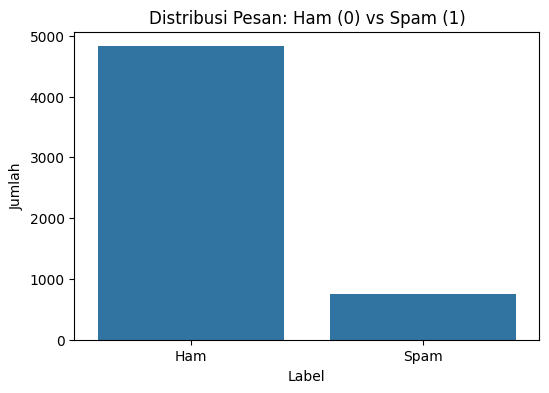

In [5]:

import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi distribusi label
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df)
plt.title('Distribusi Pesan: Ham (0) vs Spam (1)')
plt.xlabel('Label')
plt.ylabel('Jumlah')
plt.xticks([0,1], ['Ham', 'Spam'])
plt.show()


In [6]:
'''
Solution:
'''
documents = ['Hello, how are you!',
             'Win money, win from home.',
             'Call me now.',
             'Hello, Call hello you tomorrow?']

lower_case_documents = []
for i in documents:
    lower_case_documents.append(i.lower())
print(lower_case_documents)

['hello, how are you!', 'win money, win from home.', 'call me now.', 'hello, call hello you tomorrow?']


In [7]:
'''
Solution:
'''
sans_punctuation_documents = []
import string

for i in lower_case_documents:
    sans_punctuation_documents = [''.join(char for char in i if char not in string.punctuation) for i in lower_case_documents]

print(sans_punctuation_documents)

['hello how are you', 'win money win from home', 'call me now', 'hello call hello you tomorrow']


In [8]:
'''
Solution:
'''
preprocessed_documents = []
for i in sans_punctuation_documents:
    preprocessed_documents.append(i.split())
print(preprocessed_documents)

[['hello', 'how', 'are', 'you'], ['win', 'money', 'win', 'from', 'home'], ['call', 'me', 'now'], ['hello', 'call', 'hello', 'you', 'tomorrow']]


In [9]:
'''
Solution
'''
frequency_list = []
import pprint
from collections import Counter

for i in preprocessed_documents:
    frequency_counts = Counter(i)
    frequency_list.append(frequency_counts)

pprint.pprint(frequency_list)

[Counter({'hello': 1, 'how': 1, 'are': 1, 'you': 1}),
 Counter({'win': 2, 'money': 1, 'from': 1, 'home': 1}),
 Counter({'call': 1, 'me': 1, 'now': 1}),
 Counter({'hello': 2, 'call': 1, 'you': 1, 'tomorrow': 1})]


In [10]:
'''
Here we will look to create a frequency matrix on a smaller document set to make sure we understand how the
document-term matrix generation happens. We have created a sample document set 'documents'.
'''
documents = ['Hello, how are you!',
                'Win money, win from home.',
                'Call me now.',
                'Hello, Call hello you tomorrow?']

In [11]:
'''
Solution
'''
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()

In [12]:
'''
Practice node:
Print the 'count_vector' object which is an instance of 'CountVectorizer()'
'''
print(count_vector)

CountVectorizer()


In [13]:
'''
Solution:
'''
count_vector.fit(documents)
# Use get_feature_names_out() instead of get_feature_names()
count_vector.get_feature_names_out()

array(['are', 'call', 'from', 'hello', 'home', 'how', 'me', 'money',
       'now', 'tomorrow', 'win', 'you'], dtype=object)

In [14]:
'''
Solution
'''
doc_array = count_vector.transform(documents).toarray()
doc_array

array([[1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 2, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1]])

In [15]:
import pandas as pd
'''
Solution
'''
# Replace get_feature_names() with get_feature_names_out()
frequency_matrix = pd.DataFrame(doc_array, columns = count_vector.get_feature_names_out())
frequency_matrix

,are,call,from,hello,home,how,me,money,now,tomorrow,win,you
0,1,0,0,1,0,1,0,0,0,0,0,1
1,0,0,1,0,1,0,0,1,0,0,2,0
2,0,1,0,0,0,0,1,0,1,0,0,0
3,0,1,0,2,0,0,0,0,0,1,0,1


In [16]:
'''
Solution

NOTE: sklearn.cross_validation will be deprecated soon to sklearn.model_selection
'''
# split into training and testing sets
# USE from sklearn.model_selection import train_test_split to avoid seeing deprecation warning.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['sms_message'],
                                                    df['label'],
                                                    random_state=1)

print('Number of rows in the total set: {}'.format(df.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

Number of rows in the total set: 5572
Number of rows in the training set: 4179
Number of rows in the test set: 1393


In [17]:
'''
[Practice Node]

The code for this segment is in 2 parts. Firstly, we are learning a vocabulary dictionary for the training data
and then transforming the data into a document-term matrix; secondly, for the testing data we are only
transforming the data into a document-term matrix.

This is similar to the process we followed in Step 2.3

We will provide the transformed data to students in the variables 'training_data' and 'testing_data'.
'''

"\n[Practice Node]\n\nThe code for this segment is in 2 parts. Firstly, we are learning a vocabulary dictionary for the training data\nand then transforming the data into a document-term matrix; secondly, for the testing data we are only\ntransforming the data into a document-term matrix.\n\nThis is similar to the process we followed in Step 2.3\n\nWe will provide the transformed data to students in the variables 'training_data' and 'testing_data'.\n"

In [18]:
'''
Solution
'''
# Instantiate the CountVectorizer method
count_vector = CountVectorizer()

# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train)

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = count_vector.transform(X_test)

In [ ]:
'''
Instructions:
Calculate probability of getting a positive test result, P(Pos)
'''

'\nInstructions:\nCalculate probability of getting a positive test result, P(Pos)\n'

In [19]:
'''
Solution (skeleton code will be provided)
'''
# P(D)
p_diabetes = 0.01

# P(~D)
p_no_diabetes = 0.99

# Sensitivity or P(Pos|D)
p_pos_diabetes = 0.9

# Specificity or P(Neg|~D)
p_neg_no_diabetes = 0.9

# P(Pos)
p_pos = p_diabetes * p_pos_diabetes + p_no_diabetes  * (1-p_neg_no_diabetes)
print('The probability of getting a positive test result P(Pos) is: {}',format(p_pos))

The probability of getting a positive test result P(Pos) is: {} 0.10799999999999998


In [ ]:
'''
Instructions:
Compute the probability of an individual having diabetes, given that, that individual got a positive test result.
In other words, compute P(D|Pos).

The formula is: P(D|Pos) = (P(D) * P(Pos|D) / P(Pos)
'''

'\nInstructions:\nCompute the probability of an individual having diabetes, given that, that individual got a positive test result.\nIn other words, compute P(D|Pos).\n\nThe formula is: P(D|Pos) = (P(D) * P(Pos|D) / P(Pos)\n'

In [20]:
'''
Solution
'''
# P(D|Pos)
p_diabetes_pos = (p_diabetes * p_pos_diabetes) / p_pos
print('Probability of an individual having diabetes, given that that individual got a positive test result is:\
',format(p_diabetes_pos))

Probability of an individual having diabetes, given that that individual got a positive test result is: 0.08333333333333336


In [21]:
'''
Instructions:
Compute the probability of an individual not having diabetes, given that, that individual got a positive test result.
In other words, compute P(~D|Pos).

The formula is: P(~D|Pos) = P(~D) * P(Pos|~D) / P(Pos)

Note that P(Pos|~D) can be computed as 1 - P(Neg|~D).

Therefore:
P(Pos|~D) = p_pos_no_diabetes = 1 - 0.9 = 0.1
'''

'\nInstructions:\nCompute the probability of an individual not having diabetes, given that, that individual got a positive test result.\nIn other words, compute P(~D|Pos).\n\nThe formula is: P(~D|Pos) = P(~D) * P(Pos|~D) / P(Pos)\n\nNote that P(Pos|~D) can be computed as 1 - P(Neg|~D).\n\nTherefore:\nP(Pos|~D) = p_pos_no_diabetes = 1 - 0.9 = 0.1\n'

In [22]:
'''
Solution
'''
# P(Pos|~D)
p_pos_no_diabetes = 0.1

# P(~D|Pos)
p_no_diabetes_pos = p_no_diabetes * (1 - p_neg_no_diabetes) / p_pos
print('Probability of an individual not having diabetes, given that that individual got a positive test result is:'\
,p_no_diabetes_pos)

Probability of an individual not having diabetes, given that that individual got a positive test result is: 0.9166666666666666


In [ ]:
'''
Instructions:

We have loaded the training data into the variable 'training_data' and the testing data into the
variable 'testing_data'.

Import the MultinomialNB classifier and fit the training data into the classifier using fit(). Name your classifier
'naive_bayes'. You will be training the classifier using 'training_data' and y_train' from our split earlier.
'''

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Vektorisasi pesan
vectorizer = CountVectorizer()
# Use 'sms_message' instead of 'message'
X = vectorizer.fit_transform(df['sms_message'])

# The label column is named 'label', not 'label_num'
y = df['label']

# Bagi data untuk training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

# Vektorisasi pesan
vectorizer = CountVectorizer()
# Use 'sms_message' instead of 'message'
X = vectorizer.fit_transform(df['sms_message'])

# The label column is named 'label', not 'label_num'
y = df['label']

# Bagi data untuk training dan testing
# This split should be used for both training data and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

'''
Solution
'''
naive_bayes = MultinomialNB()
# Use the X_train and y_train from the split after vectorization
naive_bayes.fit(X_train, y_train)

'''
Instructions:
Now that our algorithm has been trained using the training data set we can now make some predictions on the test data
stored in 'testing_data' using predict(). Save your predictions into the 'predictions' variable.
'''
'''
Solution
'''
# Use the X_test from the split after vectorization
predictions = naive_bayes.predict(X_test)

'''
Instructions:
Compute the accuracy, precision, recall and F1 scores of your model using your test data 'y_test' and the predictions
you made earlier stored in the 'predictions' variable.
'''
'''
Solution
'''
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: ', format(accuracy_score(y_test, predictions)))
print('Precision score: ', format(precision_score(y_test, predictions)))
print('Recall score: ', format(recall_score(y_test, predictions)))
print('F1 score: ', format(f1_score(y_test, predictions)))

Accuracy score:  0.9856502242152466
Precision score:  0.9403973509933775
Recall score:  0.9530201342281879
F1 score:  0.9466666666666667


In [ ]:
'''
Instructions:
Now that our algorithm has been trained using the training data set we can now make some predictions on the test data
stored in 'testing_data' using predict(). Save your predictions into the 'predictions' variable.
'''

In [29]:
'''
Instructions:
Now that our algorithm has been trained using the training data set we can now make some predictions on the test data
stored in 'testing_data' using predict(). Save your predictions into the 'predictions' variable.
'''
'''
Solution
'''
# Use the X_test from the split after vectorization, not testing_data
predictions = naive_bayes.predict(X_test)

In [ ]:
'''
Instructions:
Compute the accuracy, precision, recall and F1 scores of your model using your test data 'y_test' and the predictions
you made earlier stored in the 'predictions' variable.
'''

In [30]:
'''
Solution
'''
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: ', format(accuracy_score(y_test, predictions)))
print('Precision score: ', format(precision_score(y_test, predictions)))
print('Recall score: ', format(recall_score(y_test, predictions)))
print('F1 score: ', format(f1_score(y_test, predictions)))

Accuracy score:  0.9856502242152466
Precision score:  0.9403973509933775
Recall score:  0.9530201342281879
F1 score:  0.9466666666666667


In [31]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB # Import the model

# Instantiate and train the model
model = MultinomialNB()
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Akurasi: 0.9856502242152466

Confusion Matrix:
 [[957   9]
 [  7 142]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       966
           1       0.94      0.95      0.95       149

    accuracy                           0.99      1115
   macro avg       0.97      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115

